In [1]:
import sys
import os
sys.path.insert(0, os.environ['GPED_DIR'])
from GPED import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import time

In [3]:
Ne = 8

m = 3
shift = 3
Nphi = m*Ne-shift
Q = Nphi/2.0
N = Nphi + 1
Lz = 0
qn = [Ne, Lz]

In [4]:
BInfo, OpInfo = FQHSphere(Q)

Text(0,0.5,'$V_L$')

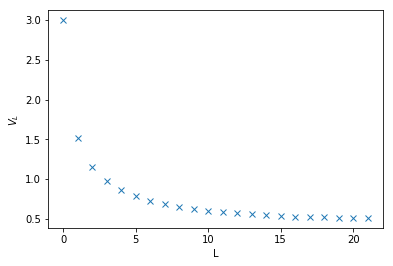

In [5]:
def Vcoulomb(L, R = 1):
    v = 2.0/R
    v = v*comb((4*Q-2*L), (2*Q-L),exact=False)
    v = v*comb((4*Q+2*L+2), (2*Q+L+1),exact=False)
    v = v/(comb((4*Q+2),(2*Q+1),exact=False))**2
    return v

Vpp = []
for L in range(int(2*Q+1)):
    Vpp.insert(0, Vcoulomb(L))

plt.plot(Vpp,'x')
plt.xlabel('L')
plt.ylabel(r'$V_L$')

In [6]:
CGTable = cg_table(Q)
Vmat = FQHSphereMatEle(Nphi, Vpp, CGTable)

h = OperatorMat(OpInfo)
for l1 in range(Nphi+1):
    for l2 in range(l1+1):
        for l3 in range(Nphi+1):
            for l4 in range(l3+1):
                if(l1 + l2 == l3 + l4):
                    m1 = l1 - Q
                    m2 = l2 - Q
                    m3 = l3 - Q
                    m4 = l4 - Q
                    
                    V1234 = Vmat[m1, m2, m3, m4]
                    V1243 = Vmat[m1, m2, m4, m3]
                    V2134 = Vmat[m2, m1, m3, m4]
                    V2143 = Vmat[m2, m1, m4, m3]
                    val = V1234 - V1243 - V2134 + V2143
                    
                    h = h + [val, 'Cdag', l1, 'Cdag', l2, 'C', l3, 'C', l4]

                    
                    

In [7]:
start = time.time()
BSet = BasisSet(BInfo, qn)
done = time.time()
elapsed = done - start
print("Make Basis : %f sec"%elapsed)

start = time.time()
H = getMat(h, BSet)
done = time.time()
elapsed = done - start
print("Make Hamiltonian : %f sec"%elapsed)

Make Basis : 26.703729 sec
Make Hamiltonian : 50.194619 sec


In [8]:
start = time.time()
E, psis = lowestEigs(H, 100)
done = time.time()
elapsed = done - start
print("Diagonalize Hamiltonian : %f sec"%elapsed)

psi = psis[0]

Diagonalize Hamiltonian : 11.494633 sec


In [9]:
print('Ground State Energy = %2.5f'%abs(E[0]))

Ground State Energy = 41.23468


In [10]:
start = time.time()
SvN, ES = EntanglementSpectrum(psi, BSet, BInfo, int(N/2))
done = time.time()
elapsed = done - start
print("Entanglement spectrum : %f sec"%elapsed)

Entanglement spectrum : 2.095790 sec


Text(0,0.5,'$\\xi$')

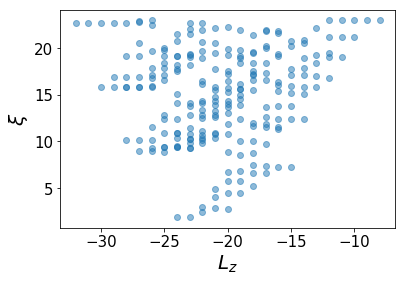

In [11]:
plot_ES(int(Ne/2), ES)
plt.xlabel(r'$L_z$')
plt.ylabel(r'$\xi$')

In [12]:
L2_list = Ltotal(Q, OpInfo, BSet, psis, Lz)

Text(0,0.5,'E')

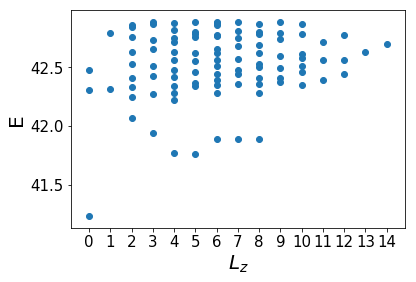

In [13]:
plt.xticks(range(19))
plt.scatter(L2_list,E)
plt.xlabel(r'$L_z$')
plt.ylabel(r'E')